___
<a href='https://cafe.naver.com/jmhonglab'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>
___
<center><em>Content Copyright by HongLab, Inc.</em></center>

# [클래스(Class)](https://docs.python.org/3/tutorial/classes.html)로 자료형 만들기

```class``` 문법을 이용하여 필요한 자료형들을 만들어서 사용할 수 있습니다.

In [1]:
# class 키워드로 정의
# 클래스 이름에는 낙타(Camel) 케이스 사용
class MyInt:

    # 인스턴스가 만들어질 때 자동으로 실행되는 특별한 메써드
    # init 앞뒤의 언더스코어 2개 주의
    # magic or Dunder(Double UNDERscores) methods
    # C++이나 Java에서는 생성자(constructor)라고 부릅니다.
    # self는 인스턴스에 대한 레퍼런스 (변수)
    def __init__(self, value):
        # 인스턴스 변수 정의
        self.value = value

    # 메써드 정의 (첫 매개변수는 self)
    def add(self, a):
        self.value = self.value + a

    # 메써드 정의 (첫 매개변수는 self)
    def print(self):
        print(self.value)


# 인스턴스는 여러 개 만들 수 있습니다.
my_int1 = MyInt(123)  # __init__(123)
my_int2 = MyInt(456)  # __init__(456)

print(my_int1.value)  # 124
my_int1.add(1)  # 메써드를 호출할 때 self는 넣어줄 필요가 없습니다.
my_int1.print()

print(my_int2.value)  # 456
my_int2.add(1)
my_int2.print()  # 457


123
124
456
457


[Python Visualization](https://pythontutor.com/visualize.html#mode=edit)을 사용해서 self의 용도를 확인해보세요.

In [8]:
# %debug
class MyInt:

    def __init__(self, value):
        self.v = value

    def add(self, a):
        self.v = self.v + a


i1 = MyInt(123)
i2 = MyInt(1004)

i1.add(1)
print(i1.v)  # 124

i2.add(1)
print(i2.v)  # 1005


ERROR:root:No traceback has been produced, nothing to debug.


124
1005


[보충] self와 instance의 id를 비교해보세요.

In [11]:
%debug
class MyInt:
    def __init__(self, value):
        self.value = value
        print(id(self))

    def add(self, a):
        self.value = self.value + a
        print(id(self))

    def print(self):
        print(self.value)
        print(id(self))


my_int1 = MyInt(123)

print(id(my_int1))

my_int1.add(1)
my_int1.print()  # 124
print(my_int1.value)  # 125


ERROR:root:No traceback has been produced, nothing to debug.


4359892336
4359892336
4359892336
124
4359892336
124


### [실습] 원 클래스 만들기

클래스 이름은 Circle  
인스턴스 변수는 x, y, r 세 가지 (x와 y는 원의 중심의 좌표, r은 반지름)  
```__init__()``` 메써드와 ```is_inside()``` 메써드 구현

[힌트] 어떤 좌표 $(i, j)$에 대해서 $(i - x)^2 + (j-y)^2 < r^2$를 만족한다면 $(i, j)$가 원 안에 포함된 것으로 판단


In [12]:
class Circle:
    def __init__(self, x, y, r):
        self.x = x
        self.y = y
        self.r = r

    def is_inside(self, i: float, j: float) -> bool:
        """i,j 가 원 내부에 있는 지 여부 판단"""
        if (self.x - i) ** 2 + (self.y - j) ** 2 <= self.r**2:
            return True
        return False


# 중심이 (1.0, 1.5)이고 반지름이 0.8인 원
my_circle = Circle(1.0, 1.5, 0.8)

print(my_circle.is_inside(1.5, 0.9))  # True
print(my_circle.is_inside(0.4, 0.5))  # False


True
False


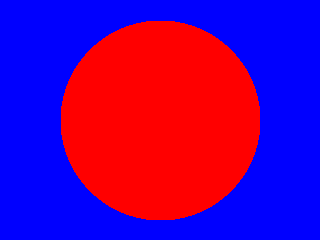

In [5]:
# 원 그리기 (앞에서 사용했던 코드 그대로)
from PIL import Image
import numpy as np

arr = np.empty((240, 320, 3), dtype=np.uint8)

for j in range(arr.shape[0]):
    for i in range(arr.shape[1]):
        arr[j, i] = (
            (255, 0, 0) if (i - 160) ** 2 + (j - 120) ** 2 < 100**2 else (0, 0, 255)
        )

im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기

im


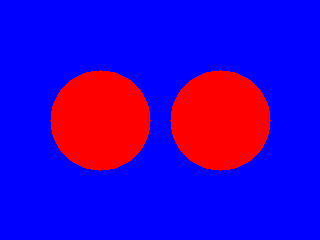

In [10]:
# 원 그리기
from PIL import Image
import numpy as np


class Circle:
    def __init__(self, x, y, r):
        self.x = x
        self.y = y
        self.r = r

    def is_inside(self, i: float, j: float) -> bool:
        """i,j 가 원 내부에 있는 지 여부 판단"""
        if (self.x - i) ** 2 + (self.y - j) ** 2 <= self.r**2:
            return True
        return False

    def draw(self, arr):
        for j in range(arr.shape[0]):
            for i in range(arr.shape[1]):
                if self.is_inside(i, j):
                    arr[j, i] = (255, 0, 0)

        return arr


c1 = Circle(100, 120, 50)
c2 = Circle(220, 120, 50)

# 배경을 파란색으로 초기화
arr = np.full((240, 320, 3), (0, 0, 255), dtype=np.uint8)

arr = c1.draw(arr)
arr = c2.draw(arr)

im = Image.fromarray(arr.clip(0, 255).astype(np.uint8))  # data type 바꿔주기

im
